<a href="https://colab.research.google.com/github/Shadman-spath004/CS895_Assignment_2_Shadman01243104/blob/main/CS895_Assignment2_fashionset_Shadman.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install keras-tuner --upgrade

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 168.1/168.1 KB 3.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 19.6 MB/s eta 0:00:00


In [ ]:
import numpy as np
np.random.seed(45)
import pandas as pd
import math
import matplotlib.pyplot as plt

import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras

from tensorflow.keras.optimizers import Adam
from tensorflow.keras import layers
from tensorflow.keras.optimizers import SGD
from keras.callbacks import LearningRateScheduler
from keras.wrappers.scikit_learn import KerasClassifier

import keras_tuner as kt

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

In [ ]:
gpus = tf.config.experimental.list_physical_devices('GPU')
print(gpus)
try:
    tf.config.experimental.set_memory_growth = True
except Exception as ex:
    print(e)

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [ ]:
# Reading input train and test data. 
# train data will be used for model building and evaluation. 
# Test data will be used to validate the model performance on unseen data.

train = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Fashion MNIST/fashion-mnist_train.csv')
test = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Fashion MNIST/fashion-mnist_test.csv")
x_test = test.loc[:, test.columns != "label"]
y_test = test['label']

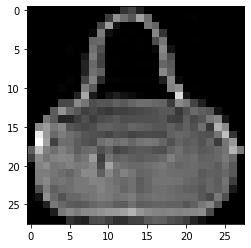

In [ ]:
# sample plot of a row from CSV to show the image. 

Image_index = 20
img = train.loc[Image_index, train.columns != "label"].values.reshape((28,28))
plt.imshow(img,cmap='gray')

In [ ]:
# Training data and label segregation.

y_data = train['label'].values
x_data = train.drop('label',axis=1)

In [ ]:
# dividing the training data into 80-20 ratio for train and validation. 

X_train, X_val, y_train, y_val = train_test_split(x_data, y_data, test_size = 0.2, random_state=169)

In [ ]:
 #this function plots the accury against the epochs.

def plot_accuracy_vs_epochs(history):
    epochs = len(history.history['val_accuracy'])+1
    fig = plt.figure(figsize=(6, 6))
    plt.plot(range(1,len(history.history['val_accuracy'])+1),history.history['val_accuracy'],label='validation')
    plt.plot(range(1,len(history.history['accuracy'])+1),history.history['accuracy'],label='training')
    plt.legend(loc=0)
    plt.xlabel('epochs')
    plt.ylabel('accuracy')
    plt.xlim([1,epochs])
    plt.grid(True)
    plt.title("Model Accuracy")
    plt.show()

In [ ]:
# this function plots the change in learning rate against the epchos.

def plot_learning_rate(loss_history):
# plot learning rate
  fig = plt.figure()
  plt.plot(range(1,epochs+1),loss_history.lrate,label='learning rate')
  plt.xlabel("epoch")
  plt.xlim([1,epochs+1])
  plt.ylabel("learning rate")
  plt.legend(loc=0)
  plt.grid(True)
  plt.title("Learning rate")
  plt.show()

In [ ]:
# function used for manaul validation.

def model_prediction(model, loc_num):
  model.predict(x_test).argmax(axis=1)
  img = x_test.iloc[loc_num].values.reshape((28,28))
  plt.imshow(img,cmap='gray')
  print("The predicted label is:" ,model.predict(x_test).argmax(axis=1)[loc_num])
  print("The actual label is: ", y_test[loc_num])

In [ ]:
# Function to create a basic model.

def nn_model_fancy(perceptrons_in_each_layer, 
                   hidden_activation, 
                   initializer, 
                   dropout_rate, 
                   optimiser_type, 
                   loss_fuction):
    model = keras.Sequential([
            # input layer
            keras.layers.Dense(perceptrons_in_each_layer, # hyperparameter 
                               activation= hidden_activation , # hyperparameter
                               input_shape=(784,), 
                               kernel_initializer=initializer # hyperparameter
                               ),
            # hidden layer 1                  
            keras.layers.Dense(perceptrons_in_each_layer, 
                               activation= hidden_activation,
                               kernel_initializer=initializer
                               ),
            # hidden layer 2
            keras.layers.Dense(perceptrons_in_each_layer, 
                               activation= hidden_activation,
                               kernel_initializer=initializer
                               ),

            keras.layers.Dropout(dropout_rate), # hyperparameter
            # Output layer
            keras.layers.Dense(10, activation=tf.nn.softmax)
        ]
    )
    model.summary()

    model.compile(optimizer = optimiser_type, # hyperparameter 
                  loss = loss_fuction,  # hyperparameter
                  metrics = ['accuracy'])

    return model

In [ ]:
# building basic model with Activation as relu

basic_model = nn_model_fancy (
perceptrons_in_each_layer = 128,
hidden_activation = "relu",
initializer = tf.keras.initializers.RandomNormal(stddev=0.01),
dropout_rate = 0 ,
optimiser_type = tf.keras.optimizers.SGD(learning_rate=0.001),
loss_fuction = "sparse_categorical_crossentropy",
)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 128)               16512     
                                                                 
 dense_2 (Dense)             (None, 128)               16512     
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_3 (Dense)             (None, 10)                1290      
                                                                 
Total params: 134,794
Trainable params: 134,794
Non-trainable params: 0
_________________________________________________________________


In [ ]:
batch_size = 128
epochs = 15
basic_model_history = basic_model.fit(X_train, y_train, batch_size=batch_size, epochs=epochs, validation_data=(X_val, y_val))

Epoch 1/15
375/375 [==============================] - 5s 6ms/step - loss: 0.9916 - accuracy: 0.6531 - val_loss: 0.6412 - val_accuracy: 0.7744
Epoch 2/15
375/375 [==============================] - 1s 4ms/step - loss: 0.5935 - accuracy: 0.7909 - val_loss: 0.5271 - val_accuracy: 0.8138
Epoch 3/15
375/375 [==============================] - 1s 3ms/step - loss: 0.5188 - accuracy: 0.8196 - val_loss: 0.4862 - val_accuracy: 0.8308
Epoch 4/15
375/375 [==============================] - 1s 3ms/step - loss: 0.4811 - accuracy: 0.8345 - val_loss: 0.4877 - val_accuracy: 0.8251
Epoch 5/15
375/375 [==============================] - 1s 3ms/step - loss: 0.4533 - accuracy: 0.8424 - val_loss: 0.4585 - val_accuracy: 0.8400
Epoch 6/15
375/375 [==============================] - 1s 3ms/step - loss: 0.4359 - accuracy: 0.8477 - val_loss: 0.4388 - val_accuracy: 0.8459
Epoch 7/15
375/375 [==============================] - 1s 3ms/step - loss: 0.4189 - accuracy: 0.8525 - val_loss: 0.4776 - val_accuracy: 0.8361
Epoch 

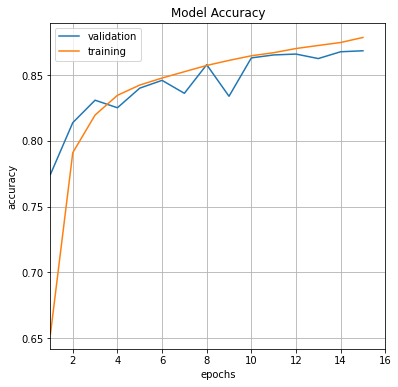

In [ ]:
plot_accuracy_vs_epochs(basic_model_history)

In [ ]:
y_pred = basic_model.predict(x_test).argmax(axis=1)
accuracy_score(y_test, y_pred)

313/313 [==============================] - 1s 2ms/step


0.8693

In [ ]:
# Manual setup for modifying learning rates per epoch
# define step decay function
# Step decay helps to converge to minima faster as the learning is increased over the epcohs.
# often in DL, intial learning is important and later with larger steps the goal can be achieved faster. 

class LossHistory(keras.callbacks.Callback):
    def on_train_begin(self, logs={}):
        self.loss = []
        self.lrate = []
        
    def on_epoch_end(self, batch, logs={}):
        self.loss.append(logs.get('loss'))
        self.lrate.append(step_decay(len(self.loss)))
        print('lrate:', step_decay(len(self.loss)))

def step_decay(epoch):
    initial_lrate = 0.005
    drop = 0.5 # new learning rate will be square root of the old leraning rate 
    drop_after_epochs = 2
    lrate = initial_lrate * math.pow(drop, math.floor((epoch)/drop_after_epochs))
    return lrate

In [ ]:
step_scheduling_model = nn_model_fancy (
perceptrons_in_each_layer = 128,
hidden_activation = "relu",
initializer = tf.keras.initializers.RandomNormal(stddev=0.01),
dropout_rate = 0 ,
optimiser_type = tf.keras.optimizers.SGD(),
loss_fuction = "sparse_categorical_crossentropy",
)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 128)               100480    
                                                                 
 dense_5 (Dense)             (None, 128)               16512     
                                                                 
 dense_6 (Dense)             (None, 128)               16512     
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_7 (Dense)             (None, 10)                1290      
                                                                 
Total params: 134,794
Trainable params: 134,794
Non-trainable params: 0
_________________________________________________________________


In [ ]:
batch_size = 128
epochs = 15

# learning schedule callback
lrate_step_decay = LearningRateScheduler(step_decay) 
loss_history_step_decay = LossHistory()
callbacks_list = [loss_history_step_decay, lrate_step_decay]

step_scheduling_model_history = step_scheduling_model.fit(X_train, y_train, 
                                                          batch_size=batch_size, 
                                                          epochs=epochs, 
                                                          validation_data=(X_val, y_val),
                                                          callbacks=callbacks_list)

Epoch 1/15
375/375 [==============================] - 2s 4ms/step - loss: 0.7379 - accuracy: 0.7326 - val_loss: 0.4918 - val_accuracy: 0.8244 - lr: 0.0050
Epoch 2/15
375/375 [==============================] - 1s 4ms/step - loss: 0.4739 - accuracy: 0.8284 - val_loss: 0.4353 - val_accuracy: 0.8442 - lr: 0.0050
Epoch 3/15
375/375 [==============================] - 1s 4ms/step - loss: 0.3924 - accuracy: 0.8576 - val_loss: 0.4072 - val_accuracy: 0.8537 - lr: 0.0025
Epoch 4/15
375/375 [==============================] - 1s 4ms/step - loss: 0.3740 - accuracy: 0.8649 - val_loss: 0.3880 - val_accuracy: 0.8572 - lr: 0.0025
Epoch 5/15
375/375 [==============================] - 1s 3ms/step - loss: 0.3473 - accuracy: 0.8750 - val_loss: 0.3672 - val_accuracy: 0.8665 - lr: 0.0012
Epoch 6/15
375/375 [==============================] - 1s 3ms/step - loss: 0.3398 - accuracy: 0.8767 - val_loss: 0.3581 - val_accuracy: 0.8717 - lr: 0.0012
Epoch 7/15
375/375 [==============================] - 1s 4ms/step - lo

In [ ]:
y_pred = step_scheduling_model.predict(x_test).argmax(axis=1)
accuracy_score(y_test, y_pred)

313/313 [==============================] - 1s 2ms/step


0.8784

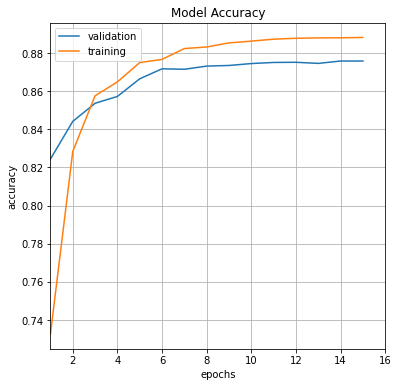

In [ ]:
plot_accuracy_vs_epochs(step_scheduling_model_history)

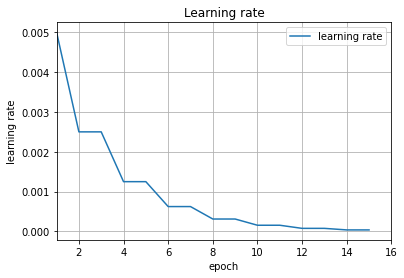

In [ ]:
plot_learning_rate(loss_history_step_decay)

In [ ]:
# observation.
#Train and validation accuracy is increased from previous model.
#The learning rate of model was not constant and accelerated as the epoch incresed.
#time taken to build the model was faster from previous model.

In [ ]:
# ADAM OPTIMIZER
# earlier we have seen the model performance with SGD, in this case changing the optimised to adam.

adam_optimiser_model = nn_model_fancy (
perceptrons_in_each_layer = 128,
hidden_activation = "relu",
initializer = tf.keras.initializers.RandomNormal(stddev=0.01),
dropout_rate = 0 ,
optimiser_type = "adam",
loss_fuction = "sparse_categorical_crossentropy",
)

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 128)               100480    
                                                                 
 dense_9 (Dense)             (None, 128)               16512     
                                                                 
 dense_10 (Dense)            (None, 128)               16512     
                                                                 
 dropout_2 (Dropout)         (None, 128)               0         
                                                                 
 dense_11 (Dense)            (None, 10)                1290      
                                                                 
Total params: 134,794
Trainable params: 134,794
Non-trainable params: 0
_________________________________________________________________


In [ ]:
batch_size = 128
epochs = 15

adam_optimiser_model_history = adam_optimiser_model.fit(X_train, y_train, \
                                            batch_size=batch_size, epochs=epochs, validation_data=(X_val, y_val))

Epoch 1/15
375/375 [==============================] - 2s 4ms/step - loss: 0.5435 - accuracy: 0.8016 - val_loss: 0.4141 - val_accuracy: 0.8492
Epoch 2/15
375/375 [==============================] - 1s 4ms/step - loss: 0.4071 - accuracy: 0.8524 - val_loss: 0.4315 - val_accuracy: 0.8447
Epoch 3/15
375/375 [==============================] - 1s 3ms/step - loss: 0.3739 - accuracy: 0.8648 - val_loss: 0.3917 - val_accuracy: 0.8621
Epoch 4/15
375/375 [==============================] - 1s 4ms/step - loss: 0.3501 - accuracy: 0.8725 - val_loss: 0.3575 - val_accuracy: 0.8693
Epoch 5/15
375/375 [==============================] - 1s 3ms/step - loss: 0.3293 - accuracy: 0.8783 - val_loss: 0.3695 - val_accuracy: 0.8662
Epoch 6/15
375/375 [==============================] - 1s 3ms/step - loss: 0.3214 - accuracy: 0.8814 - val_loss: 0.3623 - val_accuracy: 0.8691
Epoch 7/15
375/375 [==============================] - 1s 3ms/step - loss: 0.3169 - accuracy: 0.8835 - val_loss: 0.3577 - val_accuracy: 0.8725
Epoch 

In [ ]:
y_pred = adam_optimiser_model.predict(x_test).argmax(axis=1)
accuracy_score(y_test, y_pred)

313/313 [==============================] - 1s 2ms/step


0.8637

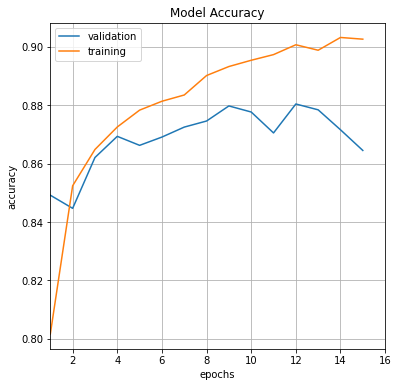

In [ ]:
plot_accuracy_vs_epochs(adam_optimiser_model_history)

In [ ]:
#observation.
#Training accuracy with adam was lot better to compare to previous models.
#Due to faster convergence model execution time was fast.

In [ ]:
# 4. Hyperparameter tuning the architecture with KerasTuner.

In [ ]:
hp = kt.HyperParameters()

In [ ]:
def build_model(hp):
    model = keras.Sequential()
    # input layer
    model.add(
        layers.Dense(input_shape=(784,),
            # Tune number of units.
            units=hp.Int("units", min_value=32, max_value=512, step=32),
            # Tune the activation function to use.
            activation=hp.Choice("activation", ["relu", "tanh"]),
        )
    )
    # hidden layer 1
    model.add(
        layers.Dense(
            units=hp.Int("units", min_value=32, max_value=512, step=32),
            activation=hp.Choice("activation", ["relu", "tanh"]),
        )
    )
    # Hidden layer 2
    model.add(
        layers.Dense(
            units=hp.Int("units", min_value=32, max_value=512, step=32),
            # Tune the activation function to use.
            activation=hp.Choice("activation", ["relu", "tanh"]),
        )
    )
    # Tune whether to use dropout.
    if hp.Boolean("dropout"):
        model.add(layers.Dropout(rate=0.25))
    model.add(layers.Dense(10, activation="softmax"))
    # Define the optimizer learning rate as a hyperparameter.
    learning_rate = hp.Float("lr", min_value=1e-4, max_value=1e-2, sampling="log")
    model.compile(
        optimizer=keras.optimizers.Adam(learning_rate=learning_rate),
        loss="sparse_categorical_crossentropy",
        metrics=["accuracy"],
    )
    return model

In [ ]:
tuner = kt.RandomSearch(
    hypermodel=build_model,
    objective="val_loss",
    max_trials=3,
    executions_per_trial=2,
    overwrite=True,
    directory="Arch_tuning_dir",
    project_name="Fashion_MNIST",
)

In [ ]:
tuner.search_space_summary()

Search space summary
Default search space size: 4
units (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 512, 'step': 32, 'sampling': 'linear'}
activation (Choice)
{'default': 'relu', 'conditions': [], 'values': ['relu', 'tanh'], 'ordered': False}
dropout (Boolean)
{'default': False, 'conditions': []}
lr (Float)
{'default': 0.0001, 'conditions': [], 'min_value': 0.0001, 'max_value': 0.01, 'step': None, 'sampling': 'log'}


In [ ]:
tuner.search(X_train, y_train, epochs=2, validation_data=(X_val, y_val))

Trial 3 Complete [00h 00m 21s]
val_loss: 0.6258822083473206

Best val_loss So Far: 0.6258822083473206
Total elapsed time: 00h 01m 05s


In [ ]:
tuner.results_summary()

Results summary
Results in Arch_tuning_dir/Fashion_MNIST
Showing 10 best trials
Trial summary
Hyperparameters:
units: 480
activation: tanh
dropout: False
lr: 0.0002253374765329313
Score: 0.6258822083473206
Trial summary
Hyperparameters:
units: 64
activation: tanh
dropout: False
lr: 0.001526142678547701
Score: 1.0627292394638062
Trial summary
Hyperparameters:
units: 480
activation: tanh
dropout: False
lr: 0.006511506479830828
Score: 2.4802205562591553


In [ ]:
#observation
#We got model best parameters and need of drop layer etc
#We haven't got the best optimised and initializer, in the next step using gridsearch cv that can be done.

In [ ]:
#5. Grid search CV for the rest of the parameters.

In [ ]:
model = KerasClassifier(build_fn = nn_model_fancy)

<ipython-input-37-0a59f9c8ebe2>:1: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model = KerasClassifier(build_fn = nn_model_fancy)


In [ ]:
params={'perceptrons_in_each_layer': [ 160],
        'hidden_activation': ["tanh" ],
        'initializer': [tf.keras.initializers.RandomNormal(mean=0., stddev=1.), tf.keras.initializers.Zeros(), \
                        tf.keras.initializers.Ones() ],
        'dropout_rate': [0.25],
        'optimiser_type': [tf.keras.optimizers.SGD(learning_rate=0.0004) , "adam", "adagrad"],
        'loss_fuction': ["sparse_categorical_crossentropy" ],
        'nb_epoch':[15]
        }

gs=GridSearchCV(estimator=model, param_grid=params, cv=2)

# now fit the dataset to the GridSearchCV object. 
gs = gs.fit(X_train, y_train)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 160)               125600    
                                                                 
 dense_5 (Dense)             (None, 160)               25760     
                                                                 
 dense_6 (Dense)             (None, 160)               25760     
                                                                 
 dropout (Dropout)           (None, 160)               0         
                                                                 
 dense_7 (Dense)             (None, 10)                1610      
                                                                 
Total params: 178,730
Trainable params: 178,730
Non-trainable params: 0
_________________________________________________________________
750/750 [==============================] - 2s 2m

In [ ]:
gs.best_params_

{'dropout_rate': 0.25,
 'hidden_activation': 'tanh',
 'initializer': <keras.initializers.initializers_v2.RandomNormal at 0x7f740c4ffdf0>,
 'loss_fuction': 'sparse_categorical_crossentropy',
 'nb_epoch': 15,
 'optimiser_type': 'adam',
 'perceptrons_in_each_layer': 160}

In [ ]:
gs.best_score_

0.6537916660308838

In [ ]:
#observation
#In this step we are able to get the rest of the best hyperparemeters to build the model.
#Early stopping in one method that helps in save time and compute, in the next step, we will build a model with best parameters and early stop.

In [ ]:
#6. Early Stopping
# if with 5 epochs with no improvement after which training will be stopped. (helps is time and compute)

In [ ]:
callback_early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)

In [ ]:
Early_stopping_model = nn_model_fancy (
perceptrons_in_each_layer = 160,
hidden_activation = "tanh",
initializer = tf.keras.initializers.RandomNormal(mean=0., stddev=1.),
dropout_rate = 0.25 ,
optimiser_type = "adam",
loss_fuction = "sparse_categorical_crossentropy",
)

Model: "sequential_20"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_80 (Dense)            (None, 160)               125600    
                                                                 
 dense_81 (Dense)            (None, 160)               25760     
                                                                 
 dense_82 (Dense)            (None, 160)               25760     
                                                                 
 dropout_19 (Dropout)        (None, 160)               0         
                                                                 
 dense_83 (Dense)            (None, 10)                1610      
                                                                 
Total params: 178,730
Trainable params: 178,730
Non-trainable params: 0
_________________________________________________________________


In [ ]:
batch_size = 128
epochs = 100

Early_stopping_model_history_with_early_stopping = Early_stopping_model.fit(X_train, y_train, 
                                                        batch_size=batch_size, 
                                                        epochs=epochs, 
                                                        callbacks=[callback_early_stop],
                                                        validation_data=(X_val, y_val))

Epoch 1/100
375/375 [==============================] - 2s 4ms/step - loss: 1.4353 - accuracy: 0.4997 - val_loss: 0.9369 - val_accuracy: 0.6606
Epoch 2/100
375/375 [==============================] - 1s 3ms/step - loss: 0.9574 - accuracy: 0.6473 - val_loss: 0.8330 - val_accuracy: 0.6957
Epoch 3/100
375/375 [==============================] - 1s 3ms/step - loss: 0.8795 - accuracy: 0.6739 - val_loss: 0.7998 - val_accuracy: 0.7068
Epoch 4/100
375/375 [==============================] - 1s 4ms/step - loss: 0.8253 - accuracy: 0.6938 - val_loss: 0.7637 - val_accuracy: 0.7176
Epoch 5/100
375/375 [==============================] - 1s 3ms/step - loss: 0.8080 - accuracy: 0.7011 - val_loss: 0.7594 - val_accuracy: 0.7199
Epoch 6/100
375/375 [==============================] - 1s 4ms/step - loss: 0.7968 - accuracy: 0.7040 - val_loss: 0.7460 - val_accuracy: 0.7230
Epoch 7/100
375/375 [==============================] - 1s 3ms/step - loss: 0.7728 - accuracy: 0.7097 - val_loss: 0.7102 - val_accuracy: 0.7377

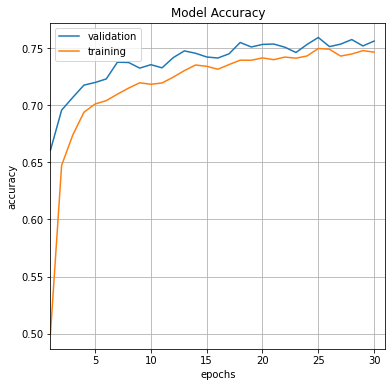

In [ ]:
plot_accuracy_vs_epochs(Early_stopping_model_history_with_early_stopping)

In [ ]:
#observation
#With early stopping and correct parameters the model accuracy has come down. but, the model confidence in this will be high on unseen data as early stopping adressed the problem of model over fitting.
#With this we will go ahead with this model for validation on unseen data

In [ ]:
#7. Manual Prediction check

313/313 [==============================] - 0s 2ms/step
The predicted label is: 0
The actual label is:  0


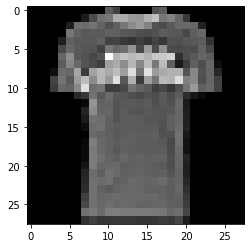

In [ ]:
model_prediction(Early_stopping_model, 9)

In [ ]:
#Label definition

#T-shirt/top
#Trouser
#Pullover
#Dress
#Coat
#Sandal
#Shirt
#Sneaker
#Bag
#Ankle boot

In [ ]:
#8. Overall Test Accuracy

In [ ]:
y_pred = Early_stopping_model.predict(x_test).argmax(axis=1)
accuracy_score(y_test, y_pred)

313/313 [==============================] - 0s 2ms/step


0.7553

In [ ]:
#observation
#The test accuracy of the model is 75.31%. The early stopping model train and validation accuracy is was almost 75.38%. This concludes that model is generic. This model output can be trusted with 73% confidence.
#** END *